In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./dataset/spam.csv", encoding="latin-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Preprocessing

In [5]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [6]:
#renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [8]:
# Ham - 0 Spam - 1
df["target"] = encoder.fit_transform(df["target"])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
df.drop_duplicates(keep='first', inplace=True)

### EDA

In [13]:
import matplotlib.pyplot as plt

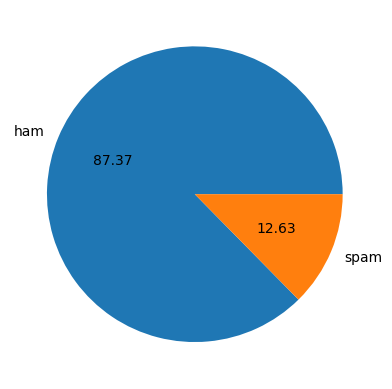

In [14]:
plt.pie(df["target"].value_counts(), labels=['ham', 'spam'], autopct="%.2f")
plt.show()

In [15]:
import nltk

In [16]:
df["num_characters"] = df["text"].apply(len)

In [17]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

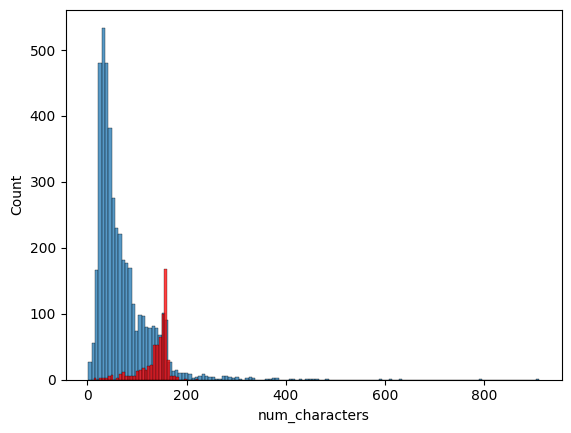

In [23]:
sns.histplot(df[df["target"] == 0]['num_characters'])
sns.histplot(df[df["target"] == 1]['num_characters'], color="r")

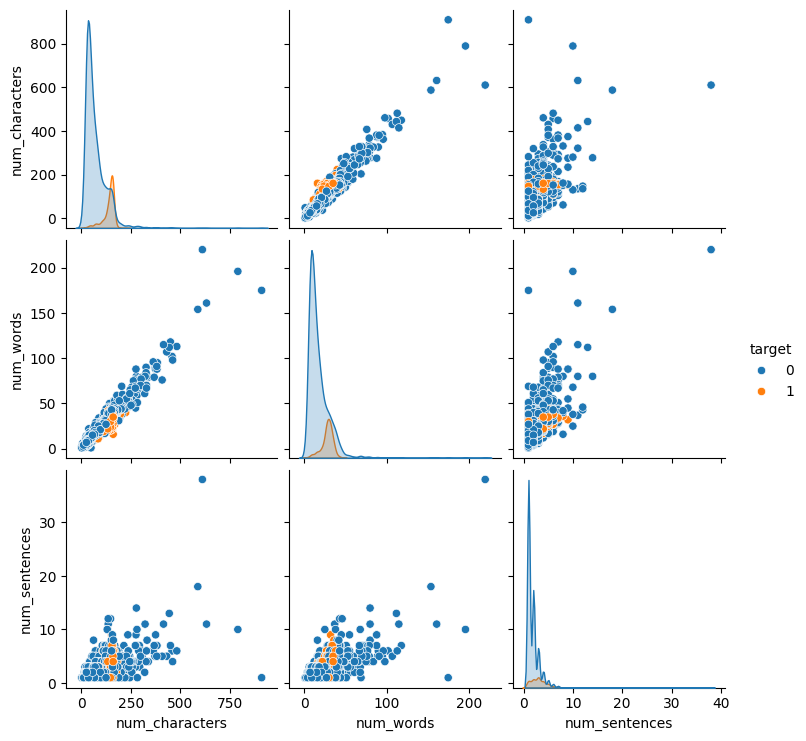

In [24]:
sns.pairplot(df, hue="target")

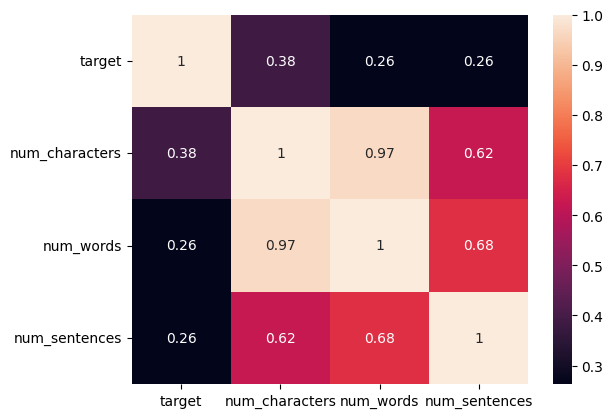

In [25]:
sns.heatmap(df.drop(columns=["text"]).corr(), annot=True)
plt.show()

### Text Preprocessing

In [26]:
from nltk.corpus import stopwords
import string

In [27]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [28]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)   
            
    text = y
    y = []
    
    for i in text:
        if i not in stopwords.words("english"):
            y.append(i)
       
    text = y
    y = [] 
        
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [29]:
df["transformed_text"] = df["text"].apply(lambda x: transform_text(x))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
from wordcloud import WordCloud

wc = WordCloud(width=700, height=700,min_font_size=10,background_color="white")

In [32]:
spam_wc = wc.generate(df[df['target'] == 1]["transformed_text"].str.cat(sep=" "))

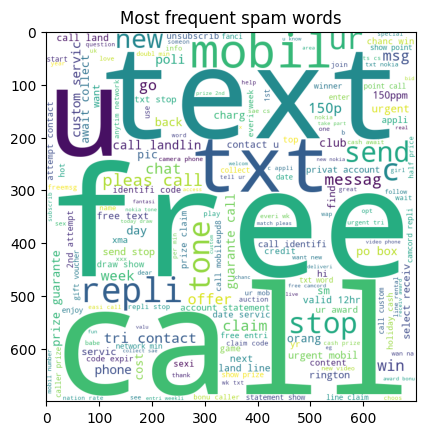

In [33]:
plt.title("Most frequent spam words")
plt.imshow(spam_wc)

In [34]:
spam_wc = wc.generate(df[df['target'] == 0]["transformed_text"].str.cat(sep=" "))

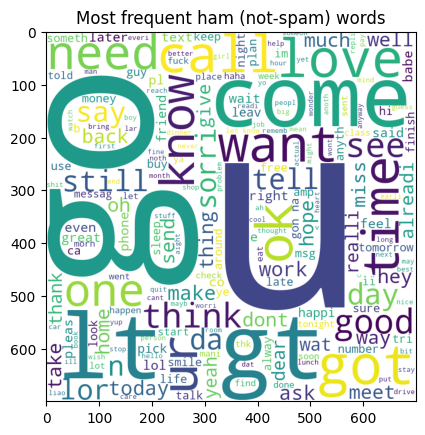

In [35]:
plt.title("Most frequent ham (not-spam) words")
plt.imshow(spam_wc)

In [36]:
spam_corpus = []

for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [37]:
from collections import Counter

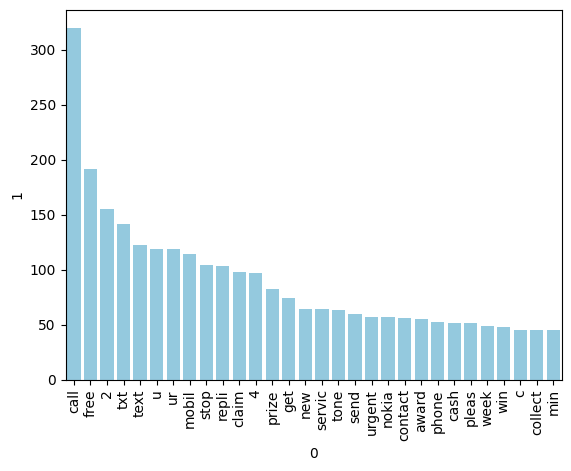

In [38]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], color='skyblue')
plt.xticks(rotation='vertical')
plt.show()

In [39]:
ham_corpus = []

for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

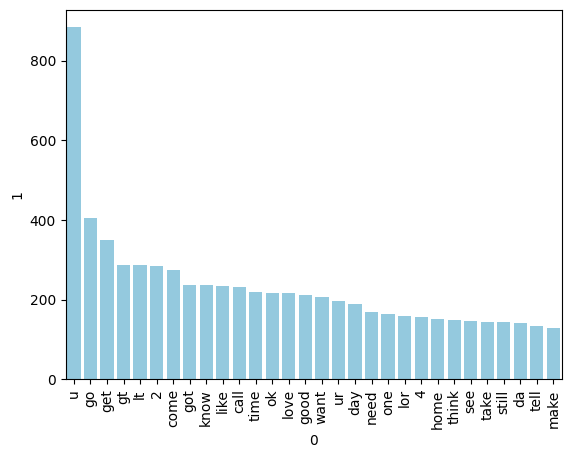

In [40]:
sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],
    color="skyblue",
)
plt.xticks(rotation="vertical")
plt.show()

### Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [54]:
X = tfid.fit_transform(df["transformed_text"]).toarray()

In [55]:
y = df['target'].values

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train, y_train)

y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [60]:
mnb.fit(X_train, y_train)

y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [61]:
bnb.fit(X_train, y_train)

y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [67]:

import pickle
import dill

In [64]:
pickle.dump(tfid, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))

In [68]:
dill.dump(transform_text, open("transform_text.pkl", "wb"))